In [43]:
import pandas as pd
import numpy as np
import datetime

In [104]:
ivr_data = pd.read_csv('ivr_data/XM_IVR_0501_1214_Extract.zip')

In [105]:
ivr_data.shape

(2270876, 63)

In [106]:
ivr_data.head()

,CALLKEY,IVRRECORDTYPE,CALLDATETIME,STARTDATETIME,ENDDATETIME,CALLERANI,ENTEREDPHONE,ACCOUNTNUMBER,TRANSFERNUMBER,DURATION,...,CNFRMDAPPO,APPOINFOSMSSUCC,APPOINFOSMSUNSUCC,HEARDBROADCASTMSG,HASOUTAGE,OUTAGEID,LSTNONXFERNODE,LSTNONXFERNODETYP,LSTNONXFERNODEMOD,LSTNONXFERNODEMODFN
0,4284032589,Inbound,2019-09-18 00:38:10,2019-09-18 00:38:10,2019-09-18 00:39:46,1621175991,NaN,2.762233e+08,106962160,96,...,NaN,NaN,NaN,NaN,NaN,NaN,prompt_NLXfinityMore,Navigational,CALLERINTENT,NL_XfinityMobile
1,4284032631,Inbound,2019-09-18 00:38:14,2019-09-18 00:38:14,2019-09-18 00:40:36,2498988660,NaN,3.480420e+09,4032217810,142,...,NaN,NaN,NaN,NaN,NaN,NaN,prompt_PhoneID,Navigational,CALLERID,GetPhnAccntNum
2,4284032716,Inbound,2019-09-18 00:29:34,2019-09-18 00:29:34,2019-09-18 00:31:10,3604397532,NaN,2.050155e+09,1943948052,96,...,NaN,NaN,NaN,NaN,NaN,NaN,prompt_AddXM,Navigational,CALLERINTENT,NL OtherHandling
3,4284033069,Inbound,2019-09-18 00:38:41,2019-09-18 00:38:41,2019-09-18 00:41:20,1834516918,NaN,2.381823e+09,4032217810,159,...,NaN,NaN,NaN,1.0,NaN,NaN,say_XMAuthLast4Fail,Navigational,XFINITYMOBILE,XM Auth
4,4284033124,Inbound,2019-09-18 00:39:02,2019-09-18 00:39:02,2019-09-18 00:39:43,70439012,NaN,2.925454e+08,1824754018,41,...,NaN,NaN,NaN,NaN,NaN,NaN,say_AddressConfThanks,Navigational,CALLERID,AddressConf


In [145]:
ivr_account_number_list = ivr_data['ACCOUNTNUMBER'].unique().tolist()

In [146]:
# this checks the accountnumber field in the ivr data file
with open('ivr_backup_data/ivr_account_number_list.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % account for account in ivr_account_number_list)

In [148]:
# this checks the transfernumber field in the ivr data file
ivr_transfer_number_list = ivr_data['TRANSFERNUMBER'].unique().tolist()
with open('ivr_backup_data/ivr_transfer_number_list.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % account for account in ivr_transfer_number_list)

In [107]:
min(ivr_data['CALLDATETIME'])

'2019-05-01 00:01:04'

In [108]:
max(ivr_data['CALLDATETIME'])

'2019-12-12 23:59:54'

In [110]:
# keep only december 2019 calls
# dec_1_2019 = datetime.strptime('2019-12-01', '%Y-%m-%d')

In [111]:
# dec_1_2019

In [112]:
# capture the call time for each record in the ivr data
ivr_data['CALLDATETIME'] = pd.to_datetime(ivr_data['CALLDATETIME'])  

In [113]:
ivr_data['CALLDATETIME'].dtype

dtype('<M8[ns]')

In [114]:
ivr_data['CALLDATETIME'].values

array(['2019-09-18T00:38:10.000000000', '2019-09-18T00:38:14.000000000',
       '2019-09-18T00:29:34.000000000', ...,
       '2019-07-24T15:24:40.000000000', '2019-07-24T15:24:19.000000000',
       '2019-07-24T15:24:28.000000000'], dtype='datetime64[ns]')

In [115]:
ivr_data.head()

,CALLKEY,IVRRECORDTYPE,CALLDATETIME,STARTDATETIME,ENDDATETIME,CALLERANI,ENTEREDPHONE,ACCOUNTNUMBER,TRANSFERNUMBER,DURATION,...,CNFRMDAPPO,APPOINFOSMSSUCC,APPOINFOSMSUNSUCC,HEARDBROADCASTMSG,HASOUTAGE,OUTAGEID,LSTNONXFERNODE,LSTNONXFERNODETYP,LSTNONXFERNODEMOD,LSTNONXFERNODEMODFN
0,4284032589,Inbound,2019-09-18 00:38:10,2019-09-18 00:38:10,2019-09-18 00:39:46,1621175991,NaN,2.762233e+08,106962160,96,...,NaN,NaN,NaN,NaN,NaN,NaN,prompt_NLXfinityMore,Navigational,CALLERINTENT,NL_XfinityMobile
1,4284032631,Inbound,2019-09-18 00:38:14,2019-09-18 00:38:14,2019-09-18 00:40:36,2498988660,NaN,3.480420e+09,4032217810,142,...,NaN,NaN,NaN,NaN,NaN,NaN,prompt_PhoneID,Navigational,CALLERID,GetPhnAccntNum
2,4284032716,Inbound,2019-09-18 00:29:34,2019-09-18 00:29:34,2019-09-18 00:31:10,3604397532,NaN,2.050155e+09,1943948052,96,...,NaN,NaN,NaN,NaN,NaN,NaN,prompt_AddXM,Navigational,CALLERINTENT,NL OtherHandling
3,4284033069,Inbound,2019-09-18 00:38:41,2019-09-18 00:38:41,2019-09-18 00:41:20,1834516918,NaN,2.381823e+09,4032217810,159,...,NaN,NaN,NaN,1.0,NaN,NaN,say_XMAuthLast4Fail,Navigational,XFINITYMOBILE,XM Auth
4,4284033124,Inbound,2019-09-18 00:39:02,2019-09-18 00:39:02,2019-09-18 00:39:43,70439012,NaN,2.925454e+08,1824754018,41,...,NaN,NaN,NaN,NaN,NaN,NaN,say_AddressConfThanks,Navigational,CALLERID,AddressConf


In [118]:
call_count_df = ivr_data[['CALLKEY','CALLDATETIME']]
call_count_df.shape

(2270876, 2)

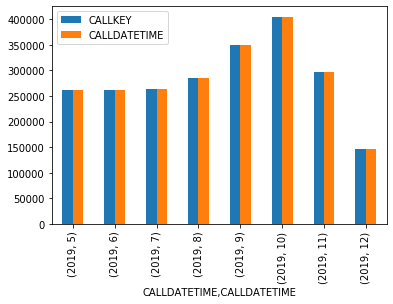

In [120]:
# see how the calls spread out over time
# ivr_data.hist(column='CALLDATETIME')
call_count_df.groupby([call_count_df["CALLDATETIME"].dt.year, call_count_df["CALLDATETIME"].dt.month]).count().plot(kind="bar")

In [141]:
ivr_account_list = ivr_data['CALLERANI'].unique().tolist()

In [142]:
# write out all the account numbers that show up in the ivr data
with open('ivr_backup_data/ivr_account_list.txt', 'w') as filehandle:
    for account in ivr_account_list:
        filehandle.write('%s\n' % account)

In [137]:
ivr_data[ivr_data['CALLERANI']==1621175991]['CALLDATETIME']

0         2019-09-18 00:38:10
7         2019-09-18 00:40:33
175374    2019-10-22 19:42:02
673254    2019-09-04 20:39:46
673470    2019-09-04 20:17:07
1445827   2019-05-19 23:54:24
1618644   2019-10-27 21:49:18
Name: CALLDATETIME, dtype: datetime64[ns]

In [19]:
# dec_calls_df = ivr_data[ivr_data['CALLDATETIME'] > dec_1_2019]

In [20]:
# dec_calls_df.columns

In [21]:
# ivr_data[ivr_data['callerAni'].isna()]

In [22]:
ivr_data['CALLDATETIME'].values

array(['2019-09-18T00:38:10.000000000', '2019-09-18T00:38:14.000000000',
       '2019-09-18T00:29:34.000000000', ...,
       '2019-07-24T15:24:40.000000000', '2019-07-24T15:24:19.000000000',
       '2019-07-24T15:24:28.000000000'], dtype='datetime64[ns]')

In [23]:
# what we want to do is
# organize order df into accounts
# find max order date
# capture the week time after that date
# if a call for that account occurred, mark 'called' column 1

In [24]:
num_df = pd.read_csv('ivr_backup_data/order_num_df.csv')
cat_df = pd.read_csv('ivr_backup_data/order_category_df.csv')

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (40,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
num_df.head()

,FRAUDNET_SCORE,TOTAL_PRICE,PRICE3,PRICE4,PRICE5,NUM_PORTIN,ACNT_BILL_FNAME_MATCHES,ACNT_BILL_LNAME_MATCHES,ACNT_SHIP_FNAME_MATCHES,ACNT_SHIP_LNAME_MATCHES,...,BYOD_RETRY_COUNT,PREORDER_LINES,ALLOWED_LINES,APPROVED_LINES,EXTERNAL_APPROVED_LINES,FIRST_PARTY_ID_SCORE,THIRD_PARTY_ID_SCORE,PRICE1,PRICE2,ORDER_CREATED_DATE
0,0.0,1554.60,119.99,119.99,0.0,0,1,1,1,1,...,0,0.0,5,5,0,553,520,599.99,599.99,1.558789e+09
1,0.0,0.00,0.00,0.00,0.0,1,1,1,1,1,...,0,0.0,4,0,0,485,502,0.00,0.00,1.571514e+09
2,0.0,1080.09,0.00,0.00,0.0,1,1,1,1,1,...,4,0.0,5,5,0,370,361,999.99,0.00,1.568388e+09
3,0.0,593.97,0.00,0.00,0.0,0,1,1,1,1,...,0,0.0,4,0,4,504,554,549.99,0.00,1.568843e+09
4,0.0,0.00,0.00,0.00,0.0,1,1,1,1,1,...,0,0.0,3,5,0,386,517,469.99,0.00,1.570415e+09


In [37]:
cat_df.head()

,MODEL1,MAKE2,BILLING_STATE,TYPE3,TYPE2,BLACKLIST_EMAIL,YELLOW_SKU,MODEL4,TPF_HIGH_YELLOW,ACCOUNT_NUMBER,...,BYOD1,BYOD2,BYOD3,BYOD4,BYOD5,CARRIER1,CARRIER2,CARRIER3,CARRIER4,CARRIER5
0,iPhone 8,Apple,MN,Phone,Phone,N,N,moto e5 play,N,716308354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,iPhone 6,NaN,MN,NaN,NaN,N,N,NaN,N,2387138088,...,APLIPHONE6GOLD64,NaN,NaN,NaN,NaN,MetroPCS,NaN,NaN,NaN,NaN
2,iPhone 11 Pro,NaN,MN,NaN,NaN,N,N,NaN,N,2297289602,...,NaN,NaN,NaN,NaN,NaN,GoogleVoice,NaN,NaN,NaN,NaN
3,iPhone 8 Plus,NaN,MN,NaN,NaN,N,N,NaN,N,2747556495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,iPhone 7 Plus,NaN,MN,NaN,NaN,N,N,NaN,N,3159523017,...,190198155795,NaN,NaN,NaN,NaN,Other/NotSure,NaN,NaN,NaN,NaN


In [38]:
order_df = pd.concat([num_df, cat_df], axis=1)

In [39]:
order_df.shape

(244134, 81)

In [40]:
min(order_df['ORDER_CREATED_DATE'])

1556582422.0

In [41]:
max(order_df['ORDER_CREATED_DATE'])

1575158344.0

In [140]:
order_df[order_df['ACCOUNT_NUMBER']==1621175991]

,FRAUDNET_SCORE,TOTAL_PRICE,PRICE3,PRICE4,PRICE5,NUM_PORTIN,ACNT_BILL_FNAME_MATCHES,ACNT_BILL_LNAME_MATCHES,ACNT_SHIP_FNAME_MATCHES,ACNT_SHIP_LNAME_MATCHES,...,BYOD1,BYOD2,BYOD3,BYOD4,BYOD5,CARRIER1,CARRIER2,CARRIER3,CARRIER4,CARRIER5


In [130]:
bd = int(1556582422.0)
last_order_date = datetime.datetime.utcfromtimestamp(bd)
last_order_date

datetime.datetime(2019, 4, 30, 0, 0, 22)

In [45]:
bd = int(1575158344.0)
last_order_date = datetime.datetime.utcfromtimestamp(bd)
last_order_date

datetime.datetime(2019, 11, 30, 23, 59, 4)

In [46]:
# call up inner_train_df
inner_train_df = pd.read_csv('ivr_backup_data/inner_train_df.csv')

In [47]:
inner_train_df.shape

(239276, 82)

In [48]:
inner_train_df.head()

,IDA_RESULT,MAKE1,EXPERIAN_RESPONSE_1,SHIPPINGMETHOD,MAKE4,MAKE5,MODEL5,EXPERIAN_RESPONSE_2,ACCOUNT_NUMBER,FRAUDNET_RESULT,...,PREORDER_LINES,ALLOWED_LINES,APPROVED_LINES,EXTERNAL_APPROVED_LINES,FIRST_PARTY_ID_SCORE,THIRD_PARTY_ID_SCORE,PRICE1,PRICE2,ORDER_CREATED_DATE,ACTIVE_WATCH_RESULT
0,GREEN,Apple,NaN,2Days,NaN,NaN,NaN,NaN,2608741079,NaN,...,-0.193577,-0.128534,-0.751217,1.728700,0.254690,0.699868,-0.180481,-0.367770,0.600580,1
1,GREEN,Apple,NaN,2Days,NaN,NaN,NaN,NaN,2541993372,NaN,...,-0.193577,0.706180,-0.751217,-0.885189,0.465524,0.708396,1.040141,-0.367770,0.318066,1
2,GREEN,Apple,NaN,2Days,Apple,NaN,NaN,NaN,2676329899,NaN,...,-0.193577,0.706180,1.383215,-0.885189,-1.056148,-0.630464,-0.180481,1.138291,0.547005,3
3,GREEN,Apple,NaN,2Days,NaN,NaN,NaN,NaN,1442915580,NaN,...,-0.193577,0.706180,1.383215,-0.885189,0.034689,0.009119,-1.672325,-0.367770,0.663532,1
4,GREEN,Apple,NaN,2Days,NaN,NaN,NaN,NaN,1368037653,NaN,...,-0.193577,-1.797961,-0.751217,0.683144,-0.588646,-0.852186,-0.451730,-0.367770,0.031195,1


In [49]:
inner_train_df.index

RangeIndex(start=0, stop=239276, step=1)

In [50]:
train_df = order_df.loc[inner_train_df.index]

In [51]:
train_df.shape

(239276, 81)

In [52]:
train_df.head()

,FRAUDNET_SCORE,TOTAL_PRICE,PRICE3,PRICE4,PRICE5,NUM_PORTIN,ACNT_BILL_FNAME_MATCHES,ACNT_BILL_LNAME_MATCHES,ACNT_SHIP_FNAME_MATCHES,ACNT_SHIP_LNAME_MATCHES,...,BYOD1,BYOD2,BYOD3,BYOD4,BYOD5,CARRIER1,CARRIER2,CARRIER3,CARRIER4,CARRIER5
0,0.0,1554.60,119.99,119.99,0.0,0,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.00,0.00,0.00,0.0,1,1,1,1,1,...,APLIPHONE6GOLD64,NaN,NaN,NaN,NaN,MetroPCS,NaN,NaN,NaN,NaN
2,0.0,1080.09,0.00,0.00,0.0,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,GoogleVoice,NaN,NaN,NaN,NaN
3,0.0,593.97,0.00,0.00,0.0,0,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.00,0.00,0.00,0.0,1,1,1,1,1,...,190198155795,NaN,NaN,NaN,NaN,Other/NotSure,NaN,NaN,NaN,NaN


In [53]:
train_df['ORDER_CREATED_DATE'].head()

0    1.558789e+09
1    1.571514e+09
2    1.568388e+09
3    1.568843e+09
4    1.570415e+09
Name: ORDER_CREATED_DATE, dtype: float64

In [127]:
train_order_date_df = train_df[['ORDER_CREATED_DATE']]
train_order_date_df.shape

(239276, 1)

In [128]:
train_order_date_df.head()

,ORDER_CREATED_DATE
0,1.558789e+09
1,1.571514e+09
2,1.568388e+09
3,1.568843e+09
4,1.570415e+09


In [131]:
train_order_date_df['ORDER_CREATED_DATE'] = pd.to_datetime(train_order_date_df['ORDER_CREATED_DATE'],unit='s')

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
# train_order_date_df["ORDER_CREATED_DATE"] = train_order_date_df["ORDER_CREATED_DATE"].astype("datetime64")

In [133]:
train_order_date_df.head()

,ORDER_CREATED_DATE
0,2019-05-25 12:52:01
1,2019-10-19 19:32:01
2,2019-09-13 15:18:21
3,2019-09-18 21:36:05
4,2019-10-07 02:25:39


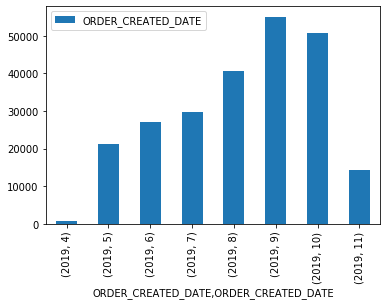

In [134]:
# see how the orders spread out over time
train_order_date_df.groupby([train_order_date_df["ORDER_CREATED_DATE"].dt.year, train_order_date_df["ORDER_CREATED_DATE"].dt.month]).count().plot(kind="bar")

In [54]:
# if multiple orders per account, find the last order date
account_df = train_df.groupby(['ACCOUNT_NUMBER']).ORDER_CREATED_DATE.max().reset_index() 
account_df.head()

,ACCOUNT_NUMBER,ORDER_CREATED_DATE
0,571,1.557849e+09
1,9660,1.572011e+09
2,49364,1.569797e+09
3,73801,1.569706e+09
4,141229,1.565371e+09


In [55]:
account_df.rename(columns={'ORDER_CREATED_DATE':'LAST_ORDER_DATE'}, inplace=True)

In [56]:
account_df.head()

,ACCOUNT_NUMBER,LAST_ORDER_DATE
0,571,1.557849e+09
1,9660,1.572011e+09
2,49364,1.569797e+09
3,73801,1.569706e+09
4,141229,1.565371e+09


In [139]:
account_df[account_df['ACCOUNT_NUMBER']==1621175991]

,ACCOUNT_NUMBER,LAST_ORDER_DATE,called


In [57]:
account_df.columns

Index(['ACCOUNT_NUMBER', 'LAST_ORDER_DATE'], dtype='object')

In [95]:
account_df.shape

(191927, 3)

In [59]:
# type(lastest_call_df)

In [67]:
def convert_to_datetime(unix_time):
#     print('unix_time={}'.format(unix_time))
    bd = int(unix_time)
    return datetime.datetime.utcfromtimestamp(bd)

In [90]:
# need a function to extract ivr_data rows by date range and account
# this matches up a call that occurs within 1 week (month) since last order for an account
def called(account, unix_beg_date):
    beg_date = convert_to_datetime(unix_beg_date)
    end_date = beg_date + datetime.timedelta(days=30)
#     print('beg_date, end_date={},{}'.format(beg_date, end_date))
#     print('account={}'.format(account))
    account_calls_df = ivr_data[ivr_data['CALLERANI']==account]
#     print('account_calls_df shape={}'.format(account_calls_df.shape))
    call_date_list = account_calls_df['CALLDATETIME'].values.tolist()
    for call_unix_date_ns in call_date_list:
#         print(type(call_unix_date_ns))
        call_unix_date = call_unix_date_ns/1000000000
#         print('call_unix_date={}'.format(call_unix_date))
        call_datetime = convert_to_datetime(call_unix_date)
        if (call_datetime > beg_date) & (call_datetime <= end_date):
            return True
    return False

In [75]:
unix_order_date = train_df.iloc[0]['ORDER_CREATED_DATE']
unix_order_date     

1558788721.0

In [76]:
# type(unix_order_date)

In [77]:
# account = train_df.iloc[0]['ACCOUNT_NUMBER']
# account

In [78]:
account = 2177522724

In [79]:
called(account, unix_order_date)

False

In [89]:
ivr_data[ivr_data['CALLERANI']==account]

,CALLKEY,IVRRECORDTYPE,CALLDATETIME,STARTDATETIME,ENDDATETIME,CALLERANI,ENTEREDPHONE,ACCOUNTNUMBER,TRANSFERNUMBER,DURATION,...,CNFRMDAPPO,APPOINFOSMSSUCC,APPOINFOSMSUNSUCC,HEARDBROADCASTMSG,HASOUTAGE,OUTAGEID,LSTNONXFERNODE,LSTNONXFERNODETYP,LSTNONXFERNODEMOD,LSTNONXFERNODEMODFN
73237,4535974653,Inbound,2019-12-11 01:04:46,2019-12-11 01:04:46,2019-12-11 01:06:57,2177522724,NaN,3.926280e+09,106962160,131,...,NaN,NaN,NaN,NaN,NaN,NaN,prompt_XMLastFourSMOP,Navigational,XFINITYMOBILE,XM Auth
978145,4449822430,Inbound,2019-11-11 11:14:45,2019-11-11 11:14:45,2019-11-11 11:16:27,2177522724,NaN,3.926280e+09,4032217810,102,...,NaN,NaN,NaN,NaN,NaN,NaN,prompt_NLXfinityOptions,Navigational,CALLERINTENT,NL_XfinityMobile
1771633,3956349960,Inbound,2019-06-04 13:13:50,2019-06-04 13:13:50,2019-06-04 13:15:39,2177522724,NaN,3.926280e+09,4032217810,109,...,NaN,NaN,NaN,NaN,NaN,NaN,prompt_NLXfinityOptions,Navigational,CALLERINTENT,NL_XfinityMobile


In [91]:
account_df['called'] = account_df.apply(lambda x: called(x['ACCOUNT_NUMBER'], x['LAST_ORDER_DATE']), axis=1)

In [92]:
account_df['called'].head()

0    False
1    False
2    False
3    False
4    False
Name: called, dtype: bool

In [93]:
# only 4 calls found within a month for all the orders. Something is definitely wrong
account_df[account_df['called']==True]

,ACCOUNT_NUMBER,LAST_ORDER_DATE,called
26851,604308204,1.566593e+09,True
39841,892264564,1.562707e+09,True
189314,4236039044,1.565107e+09,True
189477,4239459532,1.569980e+09,True


In [94]:
account_df.to_csv('ivr_backup_data/account_1month_df.csv')

In [ ]:
# only two hits, no good. either longer prediction horizon or count other calls too

In [99]:
account_1week_df = pd.read_csv('ivr_backup_data/account_1week_df.csv')

In [100]:
# only 2 calls found within a week for all the orders. Something is definitely wrong
account_1week_df[account_1week_df['called']==True]

,Unnamed: 0,ACCOUNT_NUMBER,LAST_ORDER_DATE,called
26851,26851,604308204,1.566593e+09,True
189477,189477,4239459532,1.569980e+09,True
